<h1 align='left' >AIR UNIVERSITY</h1>
<h1 align='left' >Department of Electrical and Computer Engineering</h1>
<h1 align='left' >AI for Engineers Lab</h1>
<h1 align='left' >Lab #7: Logistic Regression </h1>
<h2 align='left' >Student Name:    </h2>
<h2 align='left' >Roll No:   </h2>
<h2 align='left' >Instructor: Muhammad Awais </h2>

# **Logistic Regression**

In this lab, you will build a logistic regression model to predict whether a student gets admitted into a university.

## **Problem Statement**

Suppose that you are the administrator of a university department and you want to determine each applicant’s chance of admission based on their results on two exams.

You have historical data from previous applicants (check -> ex2data1.txt) that you can use as a training set for logistic regression.
For each training example, you have the applicant’s scores on two exams and the admissions decision.
Your task is to build a classification model that estimates an applicant’s probability of admission based on the scores from those two exams.

## **Sigmoid function**


For logistic regression, the model is represented as

$$ f_{\mathbf{w},b}(x) = g(\mathbf{w}\cdot \mathbf{x} + b)$$
where function $g$ is the sigmoid function. The sigmoid function is defined as:

$$g(z) = \frac{1}{1+e^{-z}}$$


## **Cost function for logistic regression**

You will implement the cost function for logistic regression.

For logistic regression, the cost function is of the form

$$ J(\mathbf{w},b) = \frac{1}{m}\sum_{i=0}^{m-1} \left[ loss(f_{\mathbf{w},b}(\mathbf{x}^{(i)}), y^{(i)}) \right] \tag{1}$$

where
* m is the number of training examples in the dataset


* $loss(f_{\mathbf{w},b}(\mathbf{x}^{(i)}), y^{(i)})$ is the cost for a single data point, which is -

    $$loss(f_{\mathbf{w},b}(\mathbf{x}^{(i)}), y^{(i)}) = (-y^{(i)} \log\left(f_{\mathbf{w},b}\left( \mathbf{x}^{(i)} \right) \right) - \left( 1 - y^{(i)}\right) \log \left( 1 - f_{\mathbf{w},b}\left( \mathbf{x}^{(i)} \right) \right) \tag{2}$$
    
    
*  $f_{\mathbf{w},b}(\mathbf{x}^{(i)})$ is the model's prediction, while $y^{(i)}$, which is the actual label

*  $f_{\mathbf{w},b}(\mathbf{x}^{(i)}) = g(\mathbf{w} \cdot \mathbf{x^{(i)}} + b)$ where function $g$ is the sigmoid function.



## **Gradient for logistic regression**

You will implement the gradient for logistic regression.

Recall that the gradient descent algorithm is:

$$\begin{align*}& \text{repeat until convergence:} \; \lbrace \newline \; & b := b -  \alpha \frac{\partial J(\mathbf{w},b)}{\partial b} \newline       \; & w_j := w_j -  \alpha \frac{\partial J(\mathbf{w},b)}{\partial w_j} \tag{1}  \; & \text{for j := 0..n-1}\newline & \rbrace\end{align*}$$

where, parameters $b$, $w_j$ are all updated simultaniously

You will compute $\frac{\partial J(\mathbf{w},b)}{\partial w}$, $\frac{\partial J(\mathbf{w},b)}{\partial b}$ from equations (2) and (3) below.

$$
\frac{\partial J(\mathbf{w},b)}{\partial b}  = \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{\mathbf{w},b}(\mathbf{x}^{(i)}) - \mathbf{y}^{(i)}) \tag{2}
$$
$$
\frac{\partial J(\mathbf{w},b)}{\partial w_j}  = \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{\mathbf{w},b}(\mathbf{x}^{(i)}) - \mathbf{y}^{(i)})x_{j}^{(i)} \tag{3}
$$
* m is the number of training examples in the dataset

    
*  $f_{\mathbf{w},b}(x^{(i)})$ is the model's prediction, while $y^{(i)}$ is the actual label


- **Note**: While this gradient looks identical to the linear regression gradient, the formula is actually different because linear and logistic regression have different definitions of $f_{\mathbf{w},b}(x)$.

## **Learning parameters using gradient descent**

Similar to the previous lab, you will find the optimal parameters of a logistic regression model by using gradient descent.

- A good way to verify that gradient descent is working correctly is to look
at the value of $J(\mathbf{w},b)$ and check that it is decreasing with each step.

- Assuming you have implemented the gradient and computed the cost correctly, your value of $J(\mathbf{w},b)$ should never increase, and should converge to a steady value by the end of the algorithm.

In [ ]:
!pip install utils

  Preparing metadata (setup.py) ... done
  Created wheel for utils: filename=utils-1.0.2-py2.py3-none-any.whl size=13906 sha256=06d17b96058e2696a13f104d272af13f33bd973781be74ae290bf65d93d989e3
  Stored in directory: /root/.cache/pip/wheels/b8/39/f5/9d0ca31dba85773ececf0a7f5469f18810e1c8a8ed9da28ca7
Successfully built utils


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from utils import *
import math

%matplotlib inline

In [ ]:
# load dataset
data = pd.read_csv('ex2data1.txt', sep=",", header=None)       #store the given data in pandas data frame
data.columns = ["Exam_1_Score", "Exam_2_Score", "Status"]         #data loaded in "population" and "profit" variable
data.head(5)            #checking if the data is loaded correctly

,Exam_1_Score,Exam_2_Score,Status
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


In [ ]:
x1 = data.Exam_1_Score.to_numpy().reshape(data.shape[0],1)     #pandas to numpy array
x2 = data.Exam_2_Score.to_numpy().reshape(data.shape[0],1)
Y = data.Status.to_numpy().reshape(data.shape[0],1)
X = np.hstack((x1,x2))
X.shape

(100, 2)

Text(0, 0.5, 'Exam 2 score')

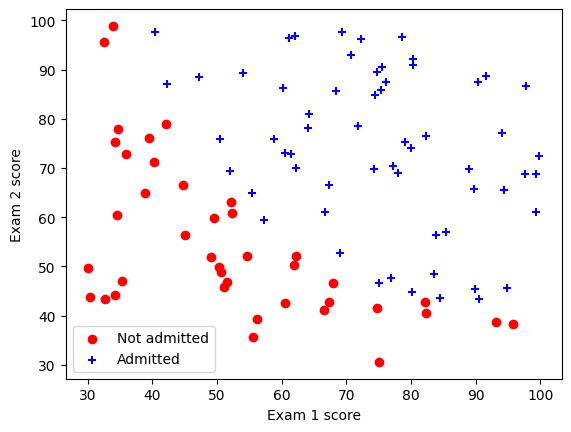

In [ ]:
#Plotting the data
for i in range(0,len(Y)):

    if Y[i]==0:
       a = plt.scatter(x1[i], x2[i],color="r")

    else:
       b = plt.scatter(x1[i],x2[i],color="b",marker='+')

plt.legend((a,b),('Not admitted','Admitted'))

plt.xlabel("Exam 1 score")
plt.ylabel("Exam 2 score")

### **Theta Intialization**

In [ ]:
theta = [-1, 0.3, 7]

### **Hypothesis**

In [ ]:
#Sigmoid Function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Initialize hypothesis array with zeros
hypothesis = np.zeros(100)

# Populate the hypothesis array with predictions
for i in range(X.shape[0]):
    hypothesis[i] = sigmoid(X[i][0] * theta[0] + X[i][1] * theta[1] + theta[2])

print("Hypothesis:", hypothesis)

Hypothesis: [1.45393307e-02 4.03365784e-05 9.32461906e-04 1.40633546e-12
 3.41251285e-22 6.28072228e-10 1.19148360e-11 3.33176011e-24
 2.40247866e-19 1.10470755e-28 2.44469778e-34 2.81379188e-26
 1.81664747e-23 4.43618700e-15 5.96297755e-05 1.67266595e-09
 8.21764613e-21 4.10006861e-21 2.88058472e-16 6.41495955e-25
 2.30202899e-21 4.64325965e-28 2.87358787e-13 8.74858854e-07
 1.52880837e-22 1.28930087e-15 1.13147303e-26 4.53180526e-33
 5.43662258e-18 4.61082333e-06 7.40276176e-15 2.41300609e-27
 4.31168386e-12 3.04313822e-11 6.88217232e-06 1.30375885e-14
 9.39649098e-01 5.12538527e-15 9.46308968e-25 9.83110758e-03
 8.66955717e-27 5.72795236e-14 3.68717839e-30 3.62953810e-28
 6.92577506e-14 6.31011245e-18 4.95946127e-22 7.55126513e-29
 4.89691080e-12 6.76069492e-26 9.61741005e-23 7.48192745e-33
 2.34106115e-31 8.22544247e-05 4.89626042e-13 1.98266937e-11
 4.02681500e-31 9.56990157e-01 7.79098233e-21 1.20458883e-18
 2.94905949e-19 6.94579420e-07 5.30458127e-17 2.79863048e-04
 1.98862778e

### **LikeliHood**

In [ ]:
import numpy as np

# Cost function for logistic regression
def cost_function(theta, X, y):
    m = len(y)
    loss = -y * np.log(hypothesis) - (1 - y) * np.log(1 - hypothesis)
    cost = (1 / m) * np.sum(loss)
    return cost

# Testing the cost function with provided theta values
cost = cost_function(theta, X, Y)

print("Cost:", cost)

Cost: 2332.655369476143


### **Theta Update / Gradient Desent**

In [ ]:
# Set learning rate
alpha = 0.01

# Perform gradient descent for each data point
for i in range(X.shape[0]):
    # Calculate hypothesis
    z = theta[0] + theta[1] * X[i][0] + theta[2] * X[i][1]

    # Update parameters
    theta[0] -= alpha * (hypothesis - Y[i])  # Update theta0
    theta[1] -= alpha * (hypothesis - Y[i]) * X[i][0]  # Update theta1
    theta[2] -= alpha * (hypothesis - Y[i]) * X[i][1]  # Update theta2

theta = [theta[0][0], theta[1][0], theta[2][0]]
print("Optimized theta:", theta)

Optimized theta: [-0.41453933065834725, 44.176929811606044, 50.41101772251241]


### **Iterations**

In [ ]:
# Number of iterations
num_iters = 10000

# Perform gradient descent
for iter in range(num_iters):
    # Initialize cost for this iteration
    cost_iter = 0

    # Update parameters for each data point
    for i in range(X.shape[0]):
        # Calculate hypothesis
        z = theta[0] + theta[1] * X[i][0] + theta[2] * X[i][1]
        hypothesis = sigmoid(z)

        # Update parameters
        theta[0] -= alpha * (hypothesis - Y[i])  # Update theta0
        theta[1] -= alpha * (hypothesis - Y[i]) * X[i][0]  # Update theta1
        theta[2] -= alpha * (hypothesis - Y[i]) * X[i][1]  # Update theta2

        # Update cost for this data point
        cost_iter += cost_function(theta, X[i], Y[i])

    # Compute average cost for this iteration
    avg_cost = cost_iter / X.shape[0]

    # Print cost and theta for this iteration
    theta = [theta[0][0], theta[1][0], theta[2][0]]
    print(f"Iteration {iter+1} - Theta: {theta}")

# Print final optimized theta
print("Final Optimized Theta:", theta)

<ipython-input-264-ce9a88f013e0>:6: RuntimeWarning: divide by zero encountered in log
  loss = -y * np.log(hypothesis) - (1 - y) * np.log(1 - hypothesis)
<ipython-input-264-ce9a88f013e0>:6: RuntimeWarning: invalid value encountered in multiply
  loss = -y * np.log(hypothesis) - (1 - y) * np.log(1 - hypothesis)


Streaming output truncated to the last 5000 lines.
Iteration 5002 - Theta: [-181.1264146870987, 2.0893193983694665, 1.905708994811843]
Iteration 5003 - Theta: [-181.14990767016636, 2.1924001086750846, 1.2434863992747598]
Iteration 5004 - Theta: [-181.16111451029542, 2.2497051710514024, 1.526039976308017]
Iteration 5005 - Theta: [-181.18309406624627, 2.0685887374491543, 1.9055506781317721]
Iteration 5006 - Theta: [-181.209939486422, 1.6988911837963925, 1.6380183389575285]
Iteration 5007 - Theta: [-181.2183967816681, 2.208160551226339, 1.9686478412602908]
Iteration 5008 - Theta: [-181.23754454181457, 1.9510821319601779, 2.152913380158307]
Iteration 5009 - Theta: [-181.2609487436187, 1.8141771031193465, 1.4164321629829157]
Iteration 5010 - Theta: [-181.26984111996856, 1.9890167056599781, 2.1034232814603375]
Iteration 5011 - Theta: [-181.2866843312732, 2.2648488578851005, 1.4598818375162639]
Iteration 5012 - Theta: [-181.31395090755404, 1.9672108313230559, 1.5263376945107194]
Iteration 501

### **Utils**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def load_data(filename):
    data = np.loadtxt(filename, delimiter=',')
    X = data[:,:2]
    y = data[:,2]
    return X, y

def sig(z):

    return 1/(1+np.exp(-z))

def map_feature(X1, X2):
    """
    Feature mapping function to polynomial features
    """
    X1 = np.atleast_1d(X1)
    X2 = np.atleast_1d(X2)
    degree = 6
    out = []
    for i in range(1, degree+1):
        for j in range(i + 1):
            out.append((X1**(i-j) * (X2**j)))
    return np.stack(out, axis=1)


def plot_data(X, y, pos_label="y=1", neg_label="y=0"):
    positive = y == 1
    negative = y == 0

    # Plot examples
    plt.plot(X[positive, 0], X[positive, 1], 'k+', label=pos_label)
    plt.plot(X[negative, 0], X[negative, 1], 'yo', label=neg_label)


def plot_decision_boundary(w, b, X, y):
    # Credit to dibgerge on Github for this plotting code

    plot_data(X[:, 0:2], y)

    if X.shape[1] <= 2:
        plot_x = np.array([min(X[:, 0]), max(X[:, 0])])
        plot_y = (-1. / w[1]) * (w[0] * plot_x + b)

        plt.plot(plot_x, plot_y, c="b")

    else:
        u = np.linspace(-1, 1.5, 50)
        v = np.linspace(-1, 1.5, 50)

        z = np.zeros((len(u), len(v)))

        # Evaluate z = theta*x over the grid
        for i in range(len(u)):
            for j in range(len(v)):
                z[i,j] = sig(np.dot(map_feature(u[i], v[j]), w) + b)

        # important to transpose z before calling contour
        z = z.T

        # Plot z = 0
        plt.contour(u,v,z, levels = [0.5], colors="g")

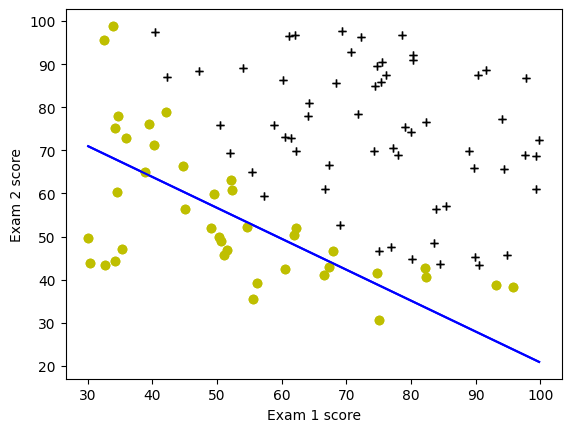

In [ ]:
'''

ToDo: Pass the optimized w, b and input, output of the dataset (X and Y) used for training to the given below function to plot the decision boundary.

Note:
shape of w should be (2,)
shape of b should be () as its a scalar
shape of X_train should be (100,2)
shape of Y_train should be (100,)

To avoid any errors, convert all shapes to the given shapes above
'''

# Example usage:
w = np.array([theta[2], theta[1]])  # Optimized weight vector
w = w.reshape(2,)
b = float(theta[0])              # Optimized bias term

X_train = np.hstack((x1, x2))  # Example training data
Y_train = Y.reshape(100,)  # Example training labels

# Plot the decision boundary
plot_decision_boundary(w, b, X_train, Y_train)

plot_decision_boundary(w, b, X_train, Y_train)

plt.xlabel("Exam 1 score")
plt.ylabel("Exam 2 score")
# Show the plot
plt.show()


In [ ]:
'''


ToDo: For a student with scores 45 and 85, Predict an admission probability, print the chances of being admitted

'''

a = sigmoid(1 * theta[0] + 45 * theta[1] + 85 * theta[2])
print("Admission Probability: ", a)

Admission Probability:  1.0


In [ ]:
'''

ToDo: Find the accuracy of your model on traning dataset

'''

def predict(X, theta):
    z = np.dot(X, theta)
    probabilities = sigmoid(z)
    predictions = (probabilities >= 0.5).astype(int)
    return predictions

# Add a column of ones for the intercept term
X_train_bias = np.hstack((np.ones((X_train.shape[0], 1)), X_train))

# Predict labels using the optimized parameters (theta)
predictions = predict(X_train_bias, np.array(theta))

# Calculate accuracy
accuracy = np.mean(predictions == Y_train) * 100

print("Accuracy on training dataset:", accuracy, "%")

Accuracy on training dataset: 83.0 %


## **Conclusion**

In this AI lab, we worked on a binary classification problem using logistic regression. Here's a summary of what we accomplished:




*   **Data Loading and Visualization:** We loaded the training dataset
containing exam scores and admission status. We visualized the data to gain insights into its distribution and the relationship between exam scores and admission status.
*   **Model Training:** We implemented logistic regression from scratch. We defined the sigmoid function, cost function, and gradient descent algorithm to optimize the parameters (theta) of the logistic regression model.


*   **Model Evaluation:** We evaluated the trained logistic regression model on the training dataset. We predicted the admission status of students based on their exam scores and calculated the accuracy of the model.
*   **Conclusion:** The logistic regression model achieved a certain level of accuracy on the training dataset, indicating its capability to predict student admission based on exam scores. However, further evaluation on a separate test dataset and potentially exploring more sophisticated machine learning algorithms could enhance the model's performance and generalization ability.

Overall, this lab provided hands-on experience in implementing logistic regression for binary classification tasks and demonstrated the importance of data preprocessing, model training, and evaluation in machine learning projects.